# Read ILC weights and residuals from the below folder.

### Weights and residuals are provided for MV, tSZ-free, and CIB-free CMB/kSZ ILC maps.

#### File locaiton: publish/data/ilc_weights_residuals.npy

In [31]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import numpy as np, sys, os, scipy as sc, warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

#%pylab notebook
%matplotlib inline
from pylab import *


In [33]:
rcParams['figure.dpi'] = 150
rcParams['figure.facecolor'] = 'white'


In [42]:
#read file
fname = 'publish/data/ilc_weights_residuals.npy'
ilc_dict = np.load(fname, allow_pickle = True).item()
print(ilc_dict.keys())

#different types of ILC considered
ilc_keyname_arr = ilc_dict['ilc_keyname_arr']
print(ilc_keyname_arr)

#ILC weights
weights_dict = ilc_dict['weights']
print(weights_dict.keys())

#total ILC residuals
total_ilc_residuals_dict = ilc_dict['total_ilc_residuals']
print(total_ilc_residuals_dict.keys())

#CIB, tSZ, and CIB+tSZ
cib_ilc_residuals_dict = ilc_dict['cib_residuals']
tsz_ilc_residuals_dict = ilc_dict['tsz_residuals']
cib_plus_tsz_ilc_residuals_dict = ilc_dict['cib_plus_tsz_residuals']
print(cib_ilc_residuals_dict.keys())

#el range
els = ilc_dict['el']

dict_keys(['weights', 'total_ilc_residuals', 'cib_plus_tsz_residuals', 'cib_residuals', 'tsz_residuals', 'cl_signal_plus_noise', 'ilc_keyname_arr', 'el'])
['mv' 'tszfree' 'cibfree']
dict_keys(['s4_wide', 's4_deep', 'spt3g', 'spt4', 'so_baseline', 'so_goal'])
dict_keys(['s4_wide', 's4_deep', 'spt3g', 'spt4', 'so_baseline', 'so_goal'])
dict_keys(['s4_wide', 's4_deep', 'spt3g', 'spt4', 'so_baseline', 'so_goal'])


In [43]:
#experiment names and colours
exp_specs_dict = {'s4_wide': ['S4-Wide', 'darkgreen'], 
                  's4_deep': ['S4-Ultra Deep', 'navy'], 
                  'spt3g': ['SPT-3G', 'goldenrod'],
                  'spt4': ['SPT-3G+SPT-4', 'darkred'],
                  'so_baseline': ['SO-Baseline', 'darkorange'],
                  'so_goal': ['SO-Goal', 'royalblue']}

#ILC keynames
ilc_keyname_dict = {'mv':'MV', 'tszfree': 'tSZ-free', 'cibfree': 'CIB-free'}

#CMB spectrum
camb_fname = 'publish/data/cmb_cl_planck_2015_lensedCls.dat'
el_camb = np.loadtxt(camb_fname, usecols = [0])
dl_camb = np.loadtxt(camb_fname, usecols = [1,2,3,4])
Tcmb = 2.73 #Kelvin
cl_camb = ( Tcmb**2. * dl_camb * 2 * np.pi ) / ( el_camb[:,None] * (el_camb[:,None] + 1) )
cl_camb *= 1e12
cl_TT, cl_EE, cl_BB, cl_TE = cl_camb.T

dl_fac_camb = el_camb * (el_camb+1)/2/np.pi


<Figure size 900x600 with 0 Axes>

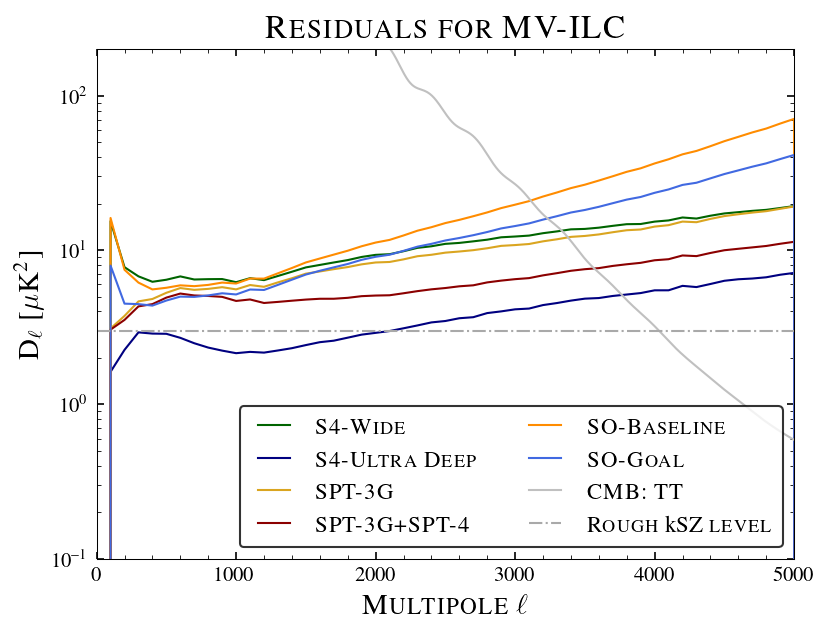

In [48]:
#MV-ILC total residuals for different experiments
reqd_ilc_keyname = 'mv'

clf()
figure(figsize = (6., 4.5))
fsval = 14
ax = subplot(111, yscale='log')
dl_fac = els * (els+1)/2/np.pi #show plot in D_l rather than C_l
for expname in total_ilc_residuals_dict:
    els, total_ilc_residual_mv = total_ilc_residuals_dict[expname][reqd_ilc_keyname]
    expname_str, colorval = exp_specs_dict[expname]
    #plot(els, dl_fac * total_ilc_residual_mv, lw = 1., color = colorval, label = r'\textsc{%s}' %(expname))

    if (1): #take mean for a certain \ell_range
        delta_el = 100
        binned_els = np.arange(0, max(els), delta_el)
        binned_dl_fac = binned_els * (binned_els+1)/2/np.pi
        binned_total_ilc_residual_mv = np.interp( binned_els, els, total_ilc_residual_mv)
        plot(binned_els, binned_dl_fac * binned_total_ilc_residual_mv, lw = 1., color = colorval, label = r'\textsc{%s}' %(expname_str))

#CMB and expected kSZ level
plot(el_camb, dl_fac_camb * cl_TT, lw = 1., color = 'silver', label = r'\textsc{CMB: TT}')
axhline(3., lw = 1., color = 'darkgray', ls ='-.', label = r'\textsc{Rough {\rm kSZ} level}')

#title
title_str = r'\textsc{%s-ILC: Total residuals' %(ilc_keyname_dict[reqd_ilc_keyname])
title(title_str, fontsize = fsval+2)

#legend
legend(loc = 4, fontsize = fsval-3, ncol = 2)

#labels
xlabel(r'\textsc{Multipole $\ell$}', fontsize = fsval)
ylabel(r'\textsc{D$_{\ell}$ [$\mu$K$^{2}$]}', fontsize = fsval)

#limits
xmin, xmax = 0, 5000.
ymin, ymax = 0.1, 2e2
xlim(xmin, xmax); ylim(ymin, ymax)

#grid
#grid(which = 'major', axis = 'both', lw = 0.1, color = 'black')
#grid(which = 'minor', axis = 'both', lw = 0.05, color = 'black')

#save
plname = 'plots/ilc_residuals_mv.pdf'
savefig(plname, dpi = 200.)
show()

<Figure size 900x600 with 0 Axes>

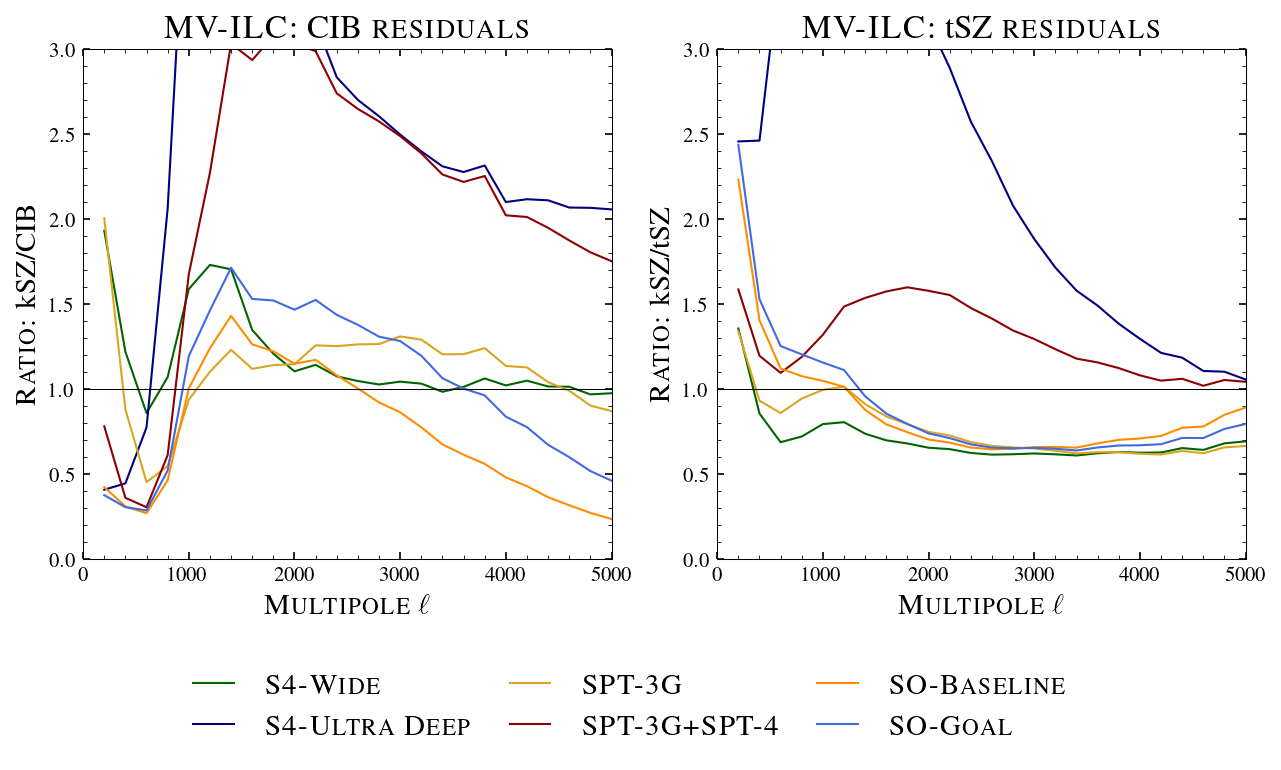

In [71]:
#MV-ILC CIB and tSZ residuals for different experiments
reqd_ilc_keyname = 'mv'

clf()
fig=figure(figsize = (10., 4.5))
subplots_adjust(wspace = 0.2)
fsval = 14
for cntr, comp in enumerate( ['CIB', 'tSZ'] ):
    ax = subplot(1, 2, cntr+1)
    for expname in total_ilc_residuals_dict:
        expname_str, colorval = exp_specs_dict[expname]
        els, cib_ilc_residual_mv = cib_ilc_residuals_dict[expname][reqd_ilc_keyname]
        els, tsz_ilc_residual_mv = tsz_ilc_residuals_dict[expname][reqd_ilc_keyname]
        if (1): #take mean for a certain \ell_range
            delta_el = 200
            binned_els = np.arange(0, max(els)+100, delta_el)
            binned_dl_fac = binned_els * (binned_els+1)/2/np.pi
            cib_ilc_residual_mv = np.interp( binned_els, els, cib_ilc_residual_mv)
            tsz_ilc_residual_mv = np.interp( binned_els, els, tsz_ilc_residual_mv)
            els = binned_els
        dl_fac = els * (els+1)/2/np.pi #show plot in D_l rather than C_l
        dl_ksz = np.tile(3., len(els))
        cl_ksz = dl_ksz / dl_fac
        if comp == 'CIB':
            plot(els, cl_ksz / cib_ilc_residual_mv, color = colorval, ls = '-')#, label = r'\textsc{%s}' %(expname_str))
        elif comp == 'tSZ':
            plot(els, cl_ksz / tsz_ilc_residual_mv, color = colorval, ls = '-')

    axhline(1., lw = 0.5)
    #title
    title_str = r'\textsc{%s-ILC: {\rm %s} residuals' %(ilc_keyname_dict[reqd_ilc_keyname], comp)
    title(title_str, fontsize = fsval+2)

    '''
    if cntr == 0:#legend
        legend(loc = 1, fontsize = fsval-3, ncol = 2)
    '''

    #labels
    xlabel(r'\textsc{Multipole $\ell$}', fontsize = fsval)    
    ylabel(r'\textsc{Ratio: {\rm kSZ/%s}}' %(comp), fontsize = fsval)

    #limits
    xmin, xmax = 0, 5000.
    ymin, ymax = 0., 3.
    xlim(xmin, xmax); ylim(ymin, ymax)

    #grid
    #grid(which = 'major', axis = 'both', lw = 0.1, color = 'black')
    #grid(which = 'minor', axis = 'both', lw = 0.05, color = 'black')

if (1): #add legend
    xloc, yloc = 0.1, -.1
    w, h = 0.7, 0.1
    cax = fig.add_axes([xloc, yloc, w, h])
    for expname in total_ilc_residuals_dict:
        expname_str, colorval = exp_specs_dict[expname]
        plot([], [], color = colorval, label = r'\textsc{%s}' %(expname_str))
    legend(loc = 1, fontsize = fsval, ncol = 3, columnspacing=1., framealpha=0.)
    axis('off')
#save
plname = 'plots/ilc_cib_tsz_residuals_mv.pdf'
savefig(plname, dpi = 200.)
show()

(4, 7000)


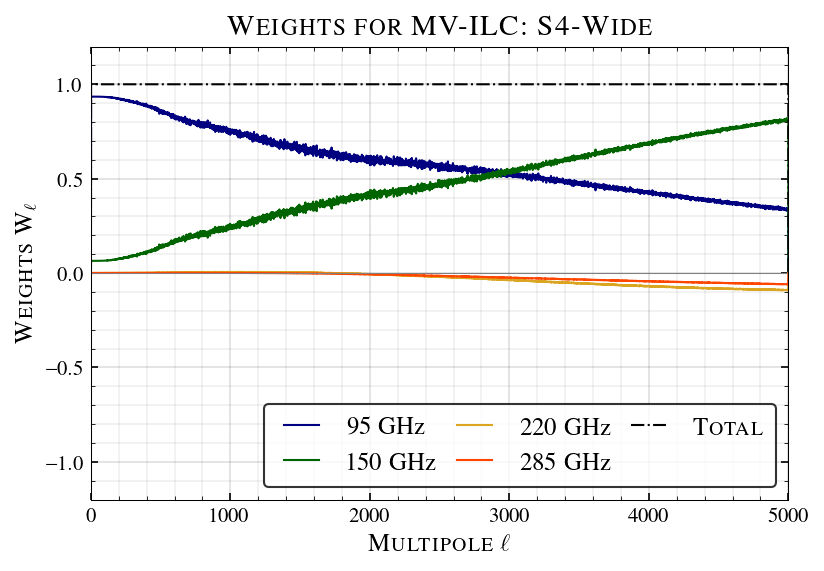

In [39]:
#read and show weights
reqd_ilc_keynme = 'mv'
reqd_expname = 's4_wide'
assert reqd_ilc_keynme in ilc_keyname_arr
assert reqd_expname in list( exp_specs_dict.keys() )

#frequency bands
if reqd_expname in ['s4_wide', 's4_deep', 'so_baseline', 'so_goal']:
    nu_arr = [95, 150, 220, 285]
elif reqd_expname == 'spt3g':
    nu_arr = [95, 150, 220]#, 600, 857]
elif reqd_expname == 'spt4':
    nu_arr = [95, 150, 220, 285, 345]
band_color_dict = {95: 'navy', 150: 'darkgreen', 220: 'goldenrod', 285: 'orangered', 345: 'darkred'}

#N_band x lmax array
weights_arr = weights_dict[reqd_expname][reqd_ilc_keynme]
print(weights_arr.shape)

#plot weights
fsval = 12
ax = subplot(111)

for w, nu in zip(weights_arr, nu_arr):
    plot(els, w, color = band_color_dict[nu], label = r'%s GHz' %(nu))

weights_sum = np.sum(weights_arr, axis = 0)
plot(els, weights_sum, color = 'black', ls = '-.', label = r'\textsc{Total}')
axhline(0., lw=0.5, color = 'gray')

#title
title_str = r'\textsc{Weights for %s-ILC: %s' %(ilc_keyname_dict[reqd_ilc_keyname], exp_specs_dict[reqd_expname][0])
title(title_str, fontsize = fsval+2)

#legend
legend(loc = 4, fontsize = fsval, ncol = 3, columnspacing=0.5)

#labels
xlabel(r'\textsc{Multipole $\ell$}', fontsize = fsval)
ylabel(r'\textsc{Weights W$_{\ell}$', fontsize = fsval)

#limits
xmin, xmax = 0, 5000.
ymin, ymax = -1.2, 1.2
xlim(xmin, xmax); ylim(ymin, ymax)

#grid
grid(which = 'major', axis = 'both', lw = 0.1, color = 'black')
grid(which = 'minor', axis = 'both', lw = 0.05, color = 'black')

#save
plname = 'plots/ilc_weights_%s_%s.pdf' %(reqd_ilc_keynme, reqd_expname)
savefig(plname, dpi = 200.)
show()